In [24]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.model_selection


import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import time
start_time = time.time()

In [25]:
df2 = pd.read_csv('roboBohr1_1.csv')
df3 = pd.read_csv('roboBohr2.csv')
df4 = pd.read_csv('roboBohr2_2.csv')

In [26]:
df=pd.concat([df2, df3, df4], ignore_index=True)
print('El num de filas y columnas: '+str(df.shape))

El num de filas y columnas: (12140, 1278)


# Para poner un target en clases y no tener un modelo de regresión sino convertirlo en uno de clasificación vamos a establecer clases dependiendo del valor de la energía de atomización 

Esto es porque para diferentes materiales, la energía de atomización por ejemplo para algunos fluoruros se encuentra entre 5- 8eV y algunos Óxidos-Cr se encuentran en valores superiores como 6-11eV https://www.sciencedirect.com/topics/engineering/atomisation-energy.

Sería interesante buscar más materiales y no realizar el cálculo de su energía de atomización sino saber qué tipo de material será.

In [27]:
#Creación del vector. La resolución que tiene el valor del traget es de 6 cifras decimales por ello,
#tomaremos la cantidad de puntos similares 10000000
E_at=np.linspace(df.Eat.min(), df.Eat.max(), num=10000000)

#n_class es la cantidad de clases que vamos a tener para clasificar
n_class=10  

cantidad=int(len(E_at)/(n_class))
v_min=df.Eat.min()
v_max=df.Eat.max()
#El vector de definición de rango de las clases
E_at_limits=[]
E_at_limits.append(v_min)
for i in range(n_class):
    E_at_limits.append(E_at[cantidad*(i+1)-1])
print(E_at_limits)

#Ahora vamos a crear el vector target de las clases 
n_filas=df.shape[0]
E_target=np.ones(n_filas)
for i in range(n_filas):
    inst=df.Eat[i]
    for j in range(n_class-1):
        if inst>=round(E_at_limits[j],6) and inst<round(E_at_limits[j+1],6):
            E_target[i]=int(j)
    if inst>=round(E_at_limits[n_class-1],6) and inst<round(E_at_limits[n_class],6):
        E_target[i]=int(n_class-1)

[-23.2453726199999, -20.999788715027442, -18.75420256446884, -16.508616413910232, -14.263030263351629, -12.017444112793024, -9.77185796223442, -7.526271811675816, -5.280685661117211, -3.035099510558606, -0.7895133600000008]


In [28]:
#Eliminando la col Y numérica 
Y=df['Eat']
df = df.drop(['Eat'], axis = 1)

import sklearn.datasets as skdata
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

%matplotlib inline

In [29]:
x_train, x_test, y_train, y_test = train_test_split(df, E_target, test_size=0.5)

t0 = time.time() #Estos parámetros son con los pasos que tomará para convergencia por descenso de gradiente que es como funciona la regresión logística
train_samples = 200

scaler = StandardScaler() #Normalizar los datos
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Del anterior ejercicio elejimos para reg. logística C=10^-2 y penalización l1 porque toma menos tiempo de computo

In [30]:
clf = LogisticRegression(C=0.01, penalty='l1', solver='saga', tol=0.01,multi_class='auto')# Modelo 
clf

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

In [31]:
clf.fit(x_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(x_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 84.72%
Test score with L1 penalty: 0.7593


In [32]:
from sklearn.metrics import f1_score

f1_l1=f1_score(y_test, clf.predict(x_test), average='macro')
print('F1 para la reg. logística es: '+ str(f1_l1))

F1 para la reg. logística es: 0.6317573945071417


C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Experimento 1

In [33]:
F1s_Test=[]
for i in range(n_class):
    j=i+1
    mlp = sklearn.neural_network.MLPClassifier(activation='logistic', hidden_layer_sizes=(j),max_iter=2600)
    mlp.fit(x_train, y_train)
    F1s_Test.append(f1_score(y_test, mlp.predict(x_test), average='macro'))
#con 100 it ,con 500 , 1000, 1500,2000 seguía apareciendo probl. de convergencia

C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-p

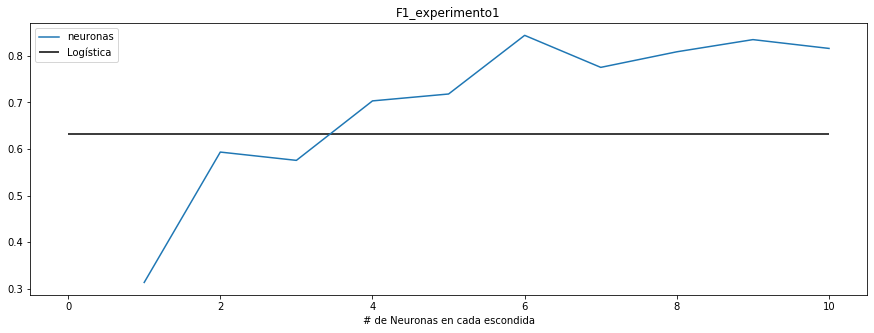

In [37]:
neuronas=np.arange(1,n_class+1)
plt.figure(figsize=(15,5))
plt.title("F1_experimento1")
plt.xlabel("# de Neuronas en cada escondida")
plt.plot(neuronas,F1s_Test, label='neuronas')
plt.hlines(f1_l1, 0, neuronas[-1], colors='k', linestyles='solid', label='Logística')
plt.legend()



Vemos que con 4 neuronas se logra mejorar los resultados de la regresión logística. Dado que una neurona con función de activación logística debería ser equivalente a una regresión logística, NO se esperaba que fuera hasta 4 neuronas la cantidad necesaria para mejorar el rendimiento de la regresión logística.

# Experimento 2

In [39]:
F1s_Test_todos=[]
for i in range(int(n_class/2)):
    F1s_Test=[]
    j=i+1
    for k in range(n_class):
        m=k+1
        mlp = sklearn.neural_network.MLPClassifier(activation='logistic', hidden_layer_sizes=(j,m),max_iter=2600)
        mlp.fit(x_train, y_train)
        F1s_Test.append(f1_score(y_test, mlp.predict(x_test), average='macro'))
    F1s_Test_todos.append(F1s_Test)
#con 100 it ,con 500 , 1000, 1500,2000 seguía apareciendo probl. de convergencia

C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-p

C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ASUS X509L\Anaconda3\lib\site-p

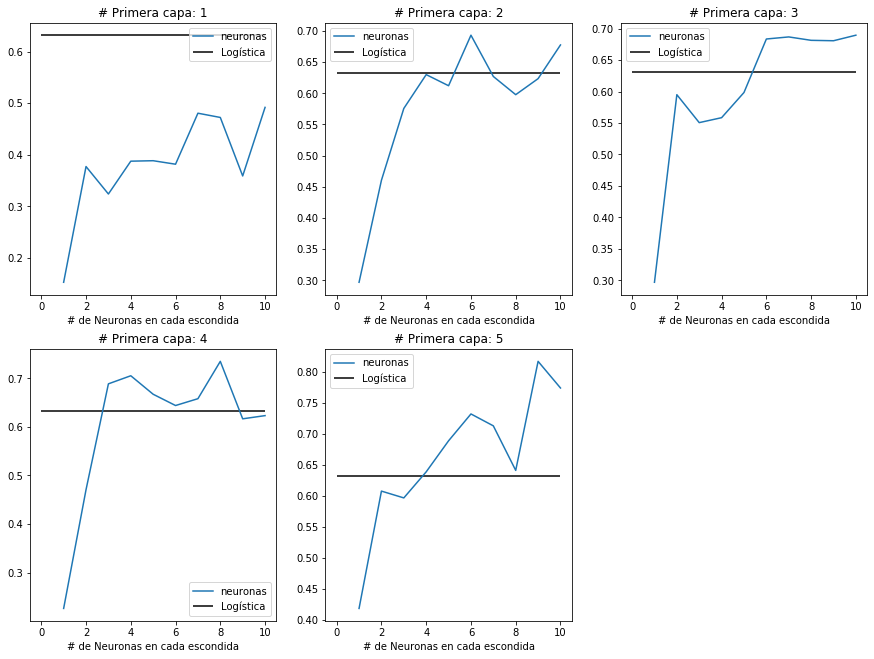

In [52]:
plt.figure(figsize=(15,11))

plt.title("F1_experimento2")
plt.xlabel("# de Neuronas en cada escondida 2")
for i in range(int(n_class/2)):
    plt.subplot(2,3,i+1)
    plt.plot(neuronas,F1s_Test_todos[i],label='neuronas')
    plt.hlines(f1_l1, 0, neuronas[-1], colors='k', linestyles='solid', label='Logística')
    plt.title(label='# de neuronas en Primera capa: '+str(i+1))
    plt.xlabel("# de Neuronas en cada escondida")
    plt.legend()
 


La gran fluctuación del valor F1 promedio se plantea puede ser por el warning que se observa en el proceso. Vemos que no se reproduce para 1 capa escondida con n neuronas el resultado del experimento anterior. 
